# Titanic - Machine Learning from Disaster


Link of this competition [Titanic](https://www.kaggle.com/competitions/titanic)


### Import

Data analysis and wrangling


In [112]:
import pandas as pd
import numpy as np

Visualization


In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

Machine learning


In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

### Acquire data


In [115]:
train_df = pd.read_csv("./input/train.csv")
test_df = pd.read_csv("./input/test.csv")
combine = [train_df, test_df]

### Analyze by describing data


Preview


In [116]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Get info

In [117]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Checking for null values

In [118]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Checking the data describe

In [119]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


### Analyze by pivoting features


Correlation b/w Pclass & Survived

In [120]:
train_df[["Pclass", "Survived"]].groupby(["Pclass"], as_index=False).mean().sort_values(
    by="Survived", ascending=False
)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Correlation b/w Sex & Survived

In [121]:
train_df[["Sex", "Survived"]].groupby(["Sex"], as_index=False).mean().sort_values(
    by="Survived", ascending=False
)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Correlation b/w SibSp & Survived

In [122]:
train_df[["SibSp", "Survived"]].groupby(["SibSp"], as_index=False).mean().sort_values(
    by="Survived", ascending=False
)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


Correlation b/w Parch & Survived

In [123]:
train_df[["Parch", "Survived"]].groupby(["Parch"], as_index=False).mean().sort_values(
    by="Survived", ascending=False
)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


### Analyze by visualizing data

Pairplot

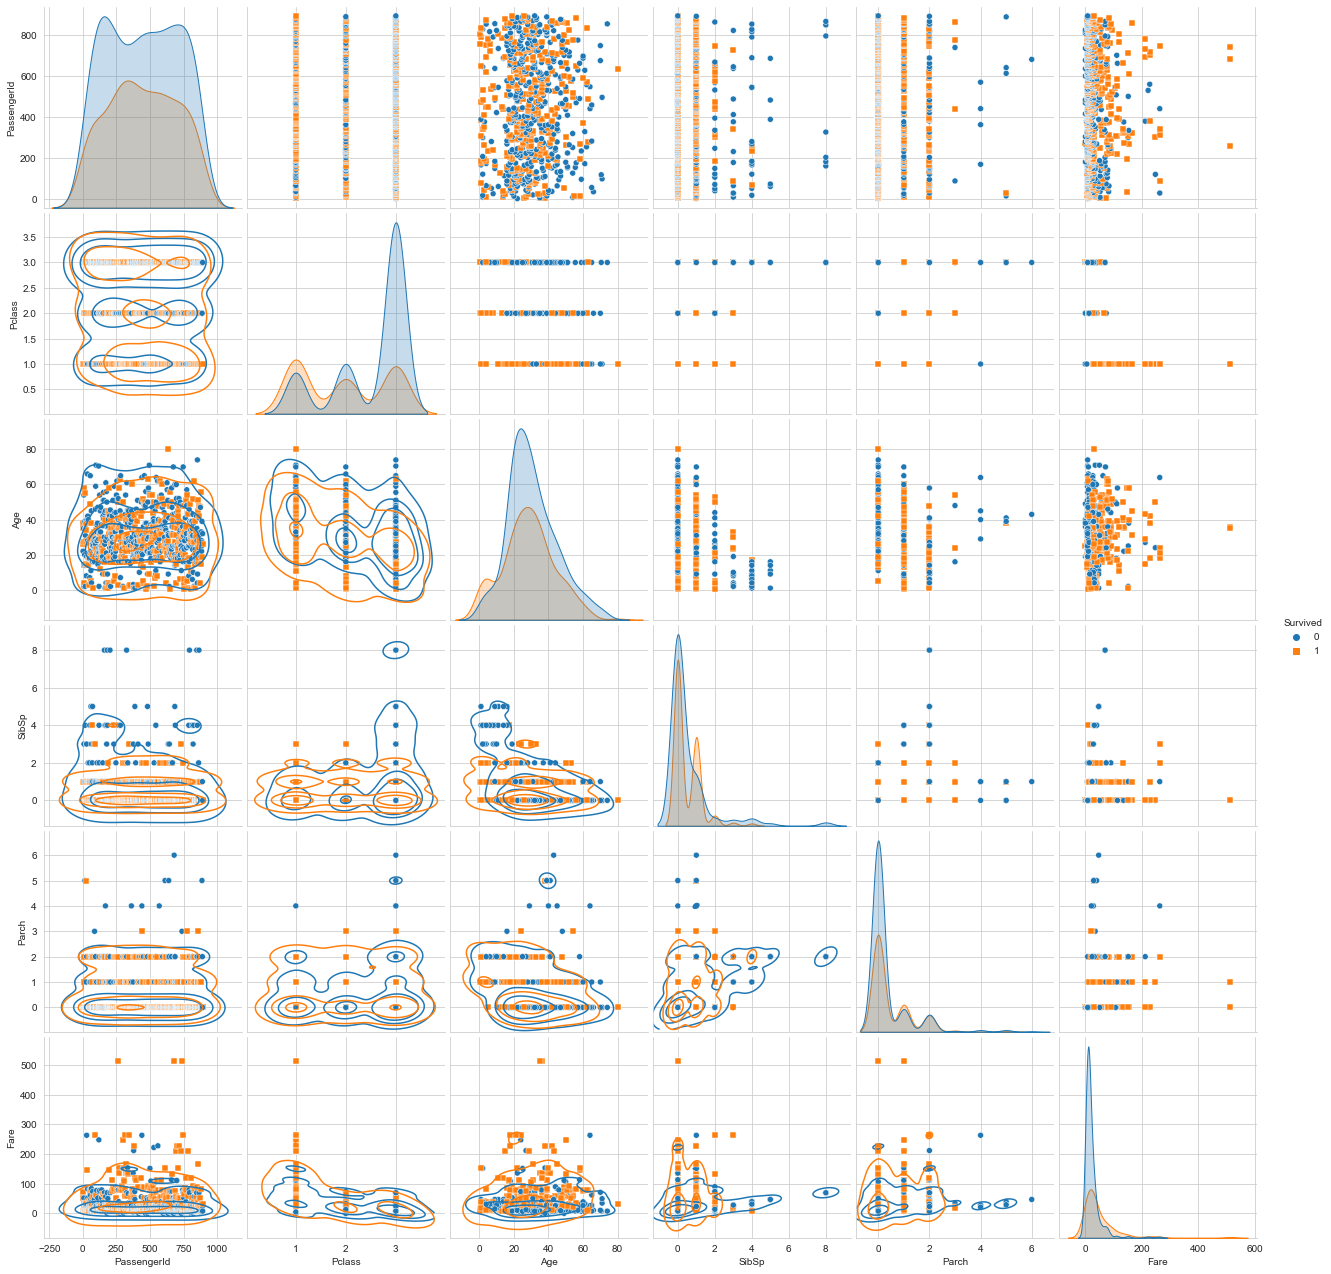

In [124]:
g = sns.pairplot(
    train_df,
    hue="Survived",
    height=3,
    diag_kind="kde",
    markers=["o", "s"],
)
g.map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()

Correlation 

<AxesSubplot:>

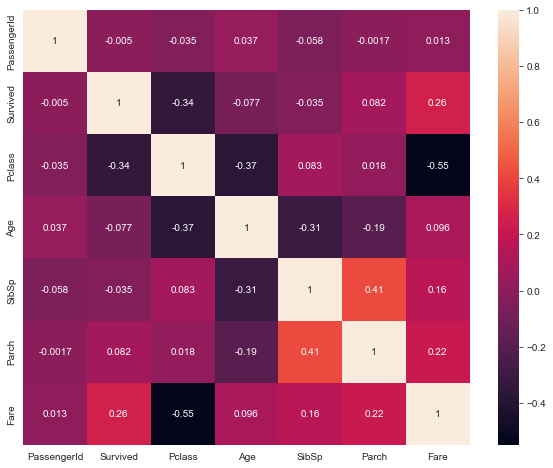

In [125]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    train_df.corr(),
    annot=True,
)

### Wrangle data

In [126]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(["Ticket", "Cabin"], axis=1)
test_df = test_df.drop(["Ticket", "Cabin"], axis=1)
combine = [train_df, test_df]

print("After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

Before (891, 12) (418, 11) (891, 12) (418, 11)
After (891, 10) (418, 9) (891, 10) (418, 9)


### Creating new feature extracting from existing

Create title

In [127]:
for dataset in combine:
    dataset["Title"] = dataset.Name.str.extract(" ([A-Za-z]+)\.", expand=False)

pd.crosstab(train_df["Title"], train_df["Sex"])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


Grouping the title

In [128]:
for dataset in combine:
    dataset["Title"] = dataset["Title"].replace(
        [
            "Lady",
            "Countess",
            "Capt",
            "Col",
            "Don",
            "Dr",
            "Major",
            "Rev",
            "Sir",
            "Jonkheer",
            "Dona",
        ],
        "Others",
    )

    dataset["Title"] = dataset["Title"].replace("Mlle", "Miss")
    dataset["Title"] = dataset["Title"].replace("Ms", "Miss")
    dataset["Title"] = dataset["Title"].replace("Mme", "Mrs")

train_df[["Title", "Survived"]].groupby(["Title"], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Others,0.347826


Updating the title

In [129]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Others": 5}
for dataset in combine:
    dataset["Title"] = dataset["Title"].map(title_mapping).astype(int)
    dataset["Title"] = dataset["Title"].fillna(0)
    dataset["Title"] = dataset["Title"]

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


Dropping Name & PassengerId in train_df & only Name from test_df

In [130]:
train_df = train_df.drop(["Name", "PassengerId"], axis=1)
test_df = test_df.drop(["Name"], axis=1)
combine = [train_df, test_df]
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,3
2,1,3,female,26.0,0,0,7.9250,S,2
3,1,1,female,35.0,1,0,53.1000,S,3
4,0,3,male,35.0,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,5
887,1,1,female,19.0,0,0,30.0000,S,2
888,0,3,female,NaN,1,2,23.4500,S,2
889,1,1,male,26.0,0,0,30.0000,C,1


### Converting a categorical feature


Bitwise the sex data

In [131]:
for dataset in combine:
    dataset["Sex"] = dataset["Sex"].map({"female": 0, "male": 1}).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,S,1
1,1,1,0,38.0,1,0,71.2833,C,3
2,1,3,0,26.0,0,0,7.9250,S,2
3,1,1,0,35.0,1,0,53.1000,S,3
4,0,3,1,35.0,0,0,8.0500,S,1


### Completing a numerical continuous feature

Checking the correlation b/w "Pclass","Sex","Age","Survived"

<AxesSubplot:>

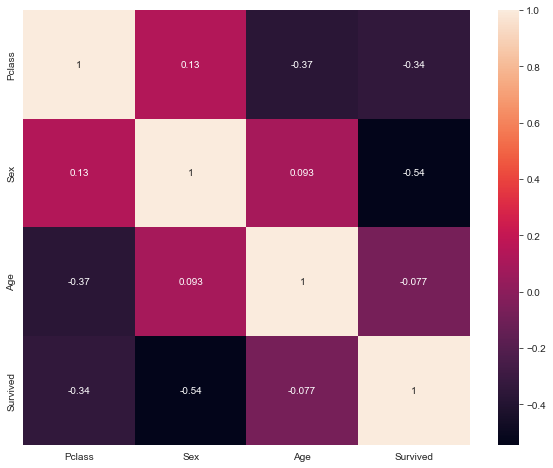

In [132]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    train_df[["Pclass", "Sex", "Age", "Survived"]].corr(),
    annot=True,
)

_Since Age is correlated with PClass and Sex so we use to complete the Age data_

In [133]:
import itertools

guess_ages = np.zeros((2, 3))

for dataset in combine:
    for i, j in itertools.product(range(2), range(3)):
        guess_df = dataset[(dataset["Sex"] == i) & (dataset["Pclass"] == j + 1)][
            "Age"
        ].dropna()

        age_guess = guess_df.median()

        # Convert random age float to nearest .5 age
        guess_ages[i, j] = int(age_guess / 0.5 + 0.5) * 0.5

    for i, j in itertools.product(range(2), range(3)):
        dataset.loc[
            (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j + 1),
            "Age",
        ] = guess_ages[i, j]

    dataset["Age"] = dataset["Age"].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22,1,0,7.2500,S,1
1,1,1,0,38,1,0,71.2833,C,3
2,1,3,0,26,0,0,7.9250,S,2
3,1,1,0,35,1,0,53.1000,S,3
4,0,3,1,35,0,0,8.0500,S,1


Find the class intervals

In [134]:
train_df["AgeBand"] = pd.cut(train_df["Age"], 5)
train_df[["AgeBand", "Survived"]].groupby(
    ["AgeBand"], as_index=False
).mean().sort_values(by="AgeBand", ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


Updating Age

In [135]:
for dataset in combine:
    dataset.loc[dataset["Age"] <= 16, "Age"] = 0
    dataset.loc[(dataset["Age"] > 16) & (dataset["Age"] <= 32), "Age"] = 1
    dataset.loc[(dataset["Age"] > 32) & (dataset["Age"] <= 48), "Age"] = 2
    dataset.loc[(dataset["Age"] > 48) & (dataset["Age"] <= 64), "Age"] = 3
    dataset.loc[dataset["Age"] > 64, "Age"] = 4
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,1,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,0,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,0,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,0,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,1,2,0,0,8.0500,S,1,"(32.0, 48.0]"


Delete AgeBand

In [136]:
train_df = train_df.drop(["AgeBand"], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,1,1,0,7.2500,S,1
1,1,1,0,2,1,0,71.2833,C,3
2,1,3,0,1,0,0,7.9250,S,2
3,1,1,0,2,1,0,53.1000,S,3
4,0,3,1,2,0,0,8.0500,S,1


### Create new feature combining existing features


Creating FamilySize

In [137]:
for dataset in combine:
    dataset["FamilySize"] = dataset["SibSp"] + dataset["Parch"] + 1

train_df[["FamilySize", "Survived"]].groupby(
    ["FamilySize"], as_index=False
).mean().sort_values(by="Survived", ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


Creating IsAlone

In [138]:
for dataset in combine:
    dataset["IsAlone"] = 0
    dataset.loc[dataset["FamilySize"] == 1, "IsAlone"] = 1

train_df[["IsAlone", "Survived"]].groupby(["IsAlone"], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


### Completing a categorical feature

Completing Embarked

In [139]:
freq_port = train_df.Embarked.dropna().mode()[0]

for dataset in combine:
    dataset["Embarked"] = dataset["Embarked"].fillna(freq_port)

train_df[["Embarked", "Survived"]].groupby(
    ["Embarked"], as_index=False
).mean().sort_values(by="Survived", ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


Converting categorical feature to numeric


In [140]:
for dataset in combine:
    dataset["Embarked"] = dataset["Embarked"].map({"S": 0, "C": 1, "Q": 2}).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,0,3,1,1,1,0,7.2500,0,1,2,0
1,1,1,0,2,1,0,71.2833,1,3,2,0
2,1,3,0,1,0,0,7.9250,0,2,1,1
3,1,1,0,2,1,0,53.1000,0,3,2,0
4,0,3,1,2,0,0,8.0500,0,1,1,1


Completing fare


In [141]:
test_df["Fare"].fillna(test_df["Fare"].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,892,3,1,2,0,0,7.8292,2,1,1,1
1,893,3,0,2,1,0,7.0000,0,3,2,0
2,894,2,1,3,0,0,9.6875,2,1,1,1
3,895,3,1,1,0,0,8.6625,0,1,1,1
4,896,3,0,1,1,1,12.2875,0,3,3,0


Grouping fare

In [142]:
train_df["FareBand"] = pd.qcut(train_df["Fare"], 4)
train_df[["FareBand", "Survived"]].groupby(
    ["FareBand"], as_index=False
).mean().sort_values(by="FareBand", ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


Converting a numeric feature

In [143]:
for dataset in combine:
    dataset.loc[dataset["Fare"] <= 7.91, "Fare"] = 0
    dataset.loc[(dataset["Fare"] > 7.91) & (dataset["Fare"] <= 14.454), "Fare"] = 1
    dataset.loc[(dataset["Fare"] > 14.454) & (dataset["Fare"] <= 31), "Fare"] = 2
    dataset.loc[dataset["Fare"] > 31, "Fare"] = 3
    dataset["Fare"] = dataset["Fare"].astype(int)

train_df = train_df.drop(["FareBand"], axis=1)
combine = [train_df, test_df]

### Creating join features

Creating FareXEmbarked

In [144]:
for dataset in combine:
    dataset["FareXEmbarked"] = dataset.Fare * dataset.Embarked

train_df.loc[:, ["FareXEmbarked", "Fare", "Embarked"]].head()

,FareXEmbarked,Fare,Embarked
0,0,0,0
1,3,3,1
2,0,1,0
3,0,3,0
4,0,1,0


Creating FamilySizeXClass

In [145]:
for dataset in combine:
    dataset["FamilySizeXClass"] = dataset.FamilySize * dataset.Pclass

train_df.loc[:, ["FamilySizeXClass", "FamilySize", "Pclass"]].head()

,FamilySizeXClass,FamilySize,Pclass
0,6,2,3
1,2,2,1
2,3,1,3
3,2,2,1
4,3,1,3


Creating AgeXClass

In [146]:
for dataset in combine:
    dataset["AgeXClass"] = dataset.Age * dataset.Pclass

train_df.loc[:, ["AgeXClass", "Age", "Pclass"]].head()

,AgeXClass,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3


### Final check

Preview

In [147]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,FareXEmbarked,FamilySizeXClass,AgeXClass
0,0,3,1,1,1,0,0,0,1,2,0,0,6,3
1,1,1,0,2,1,0,3,1,3,2,0,3,2,2
2,1,3,0,1,0,0,1,0,2,1,1,0,3,3
3,1,1,0,2,1,0,3,0,3,2,0,0,2,2
4,0,3,1,2,0,0,1,0,1,1,1,0,3,6


Info


In [148]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Survived          891 non-null    int64
 1   Pclass            891 non-null    int64
 2   Sex               891 non-null    int32
 3   Age               891 non-null    int32
 4   SibSp             891 non-null    int64
 5   Parch             891 non-null    int64
 6   Fare              891 non-null    int32
 7   Embarked          891 non-null    int32
 8   Title             891 non-null    int32
 9   FamilySize        891 non-null    int64
 10  IsAlone           891 non-null    int64
 11  FareXEmbarked     891 non-null    int32
 12  FamilySizeXClass  891 non-null    int64
 13  AgeXClass         891 non-null    int64
dtypes: int32(6), int64(8)
memory usage: 76.7 KB


Check is null nor not

In [149]:
train_df.isnull().sum()

Survived            0
Pclass              0
Sex                 0
Age                 0
SibSp               0
Parch               0
Fare                0
Embarked            0
Title               0
FamilySize          0
IsAlone             0
FareXEmbarked       0
FamilySizeXClass    0
AgeXClass           0
dtype: int64

Check all details

In [150]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Sex,891.0,0.647587,0.477990,0.0,0.0,1.0,1.0,1.0
Age,891.0,1.322110,0.820081,0.0,1.0,1.0,2.0,4.0
SibSp,891.0,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Fare,891.0,1.505051,1.118148,0.0,0.5,2.0,2.0,3.0
Embarked,891.0,0.361392,0.635673,0.0,0.0,0.0,1.0,2.0
Title,891.0,1.728395,1.030039,1.0,1.0,1.0,2.0,5.0
FamilySize,891.0,1.904602,1.613459,1.0,1.0,1.0,2.0,11.0


Visualization

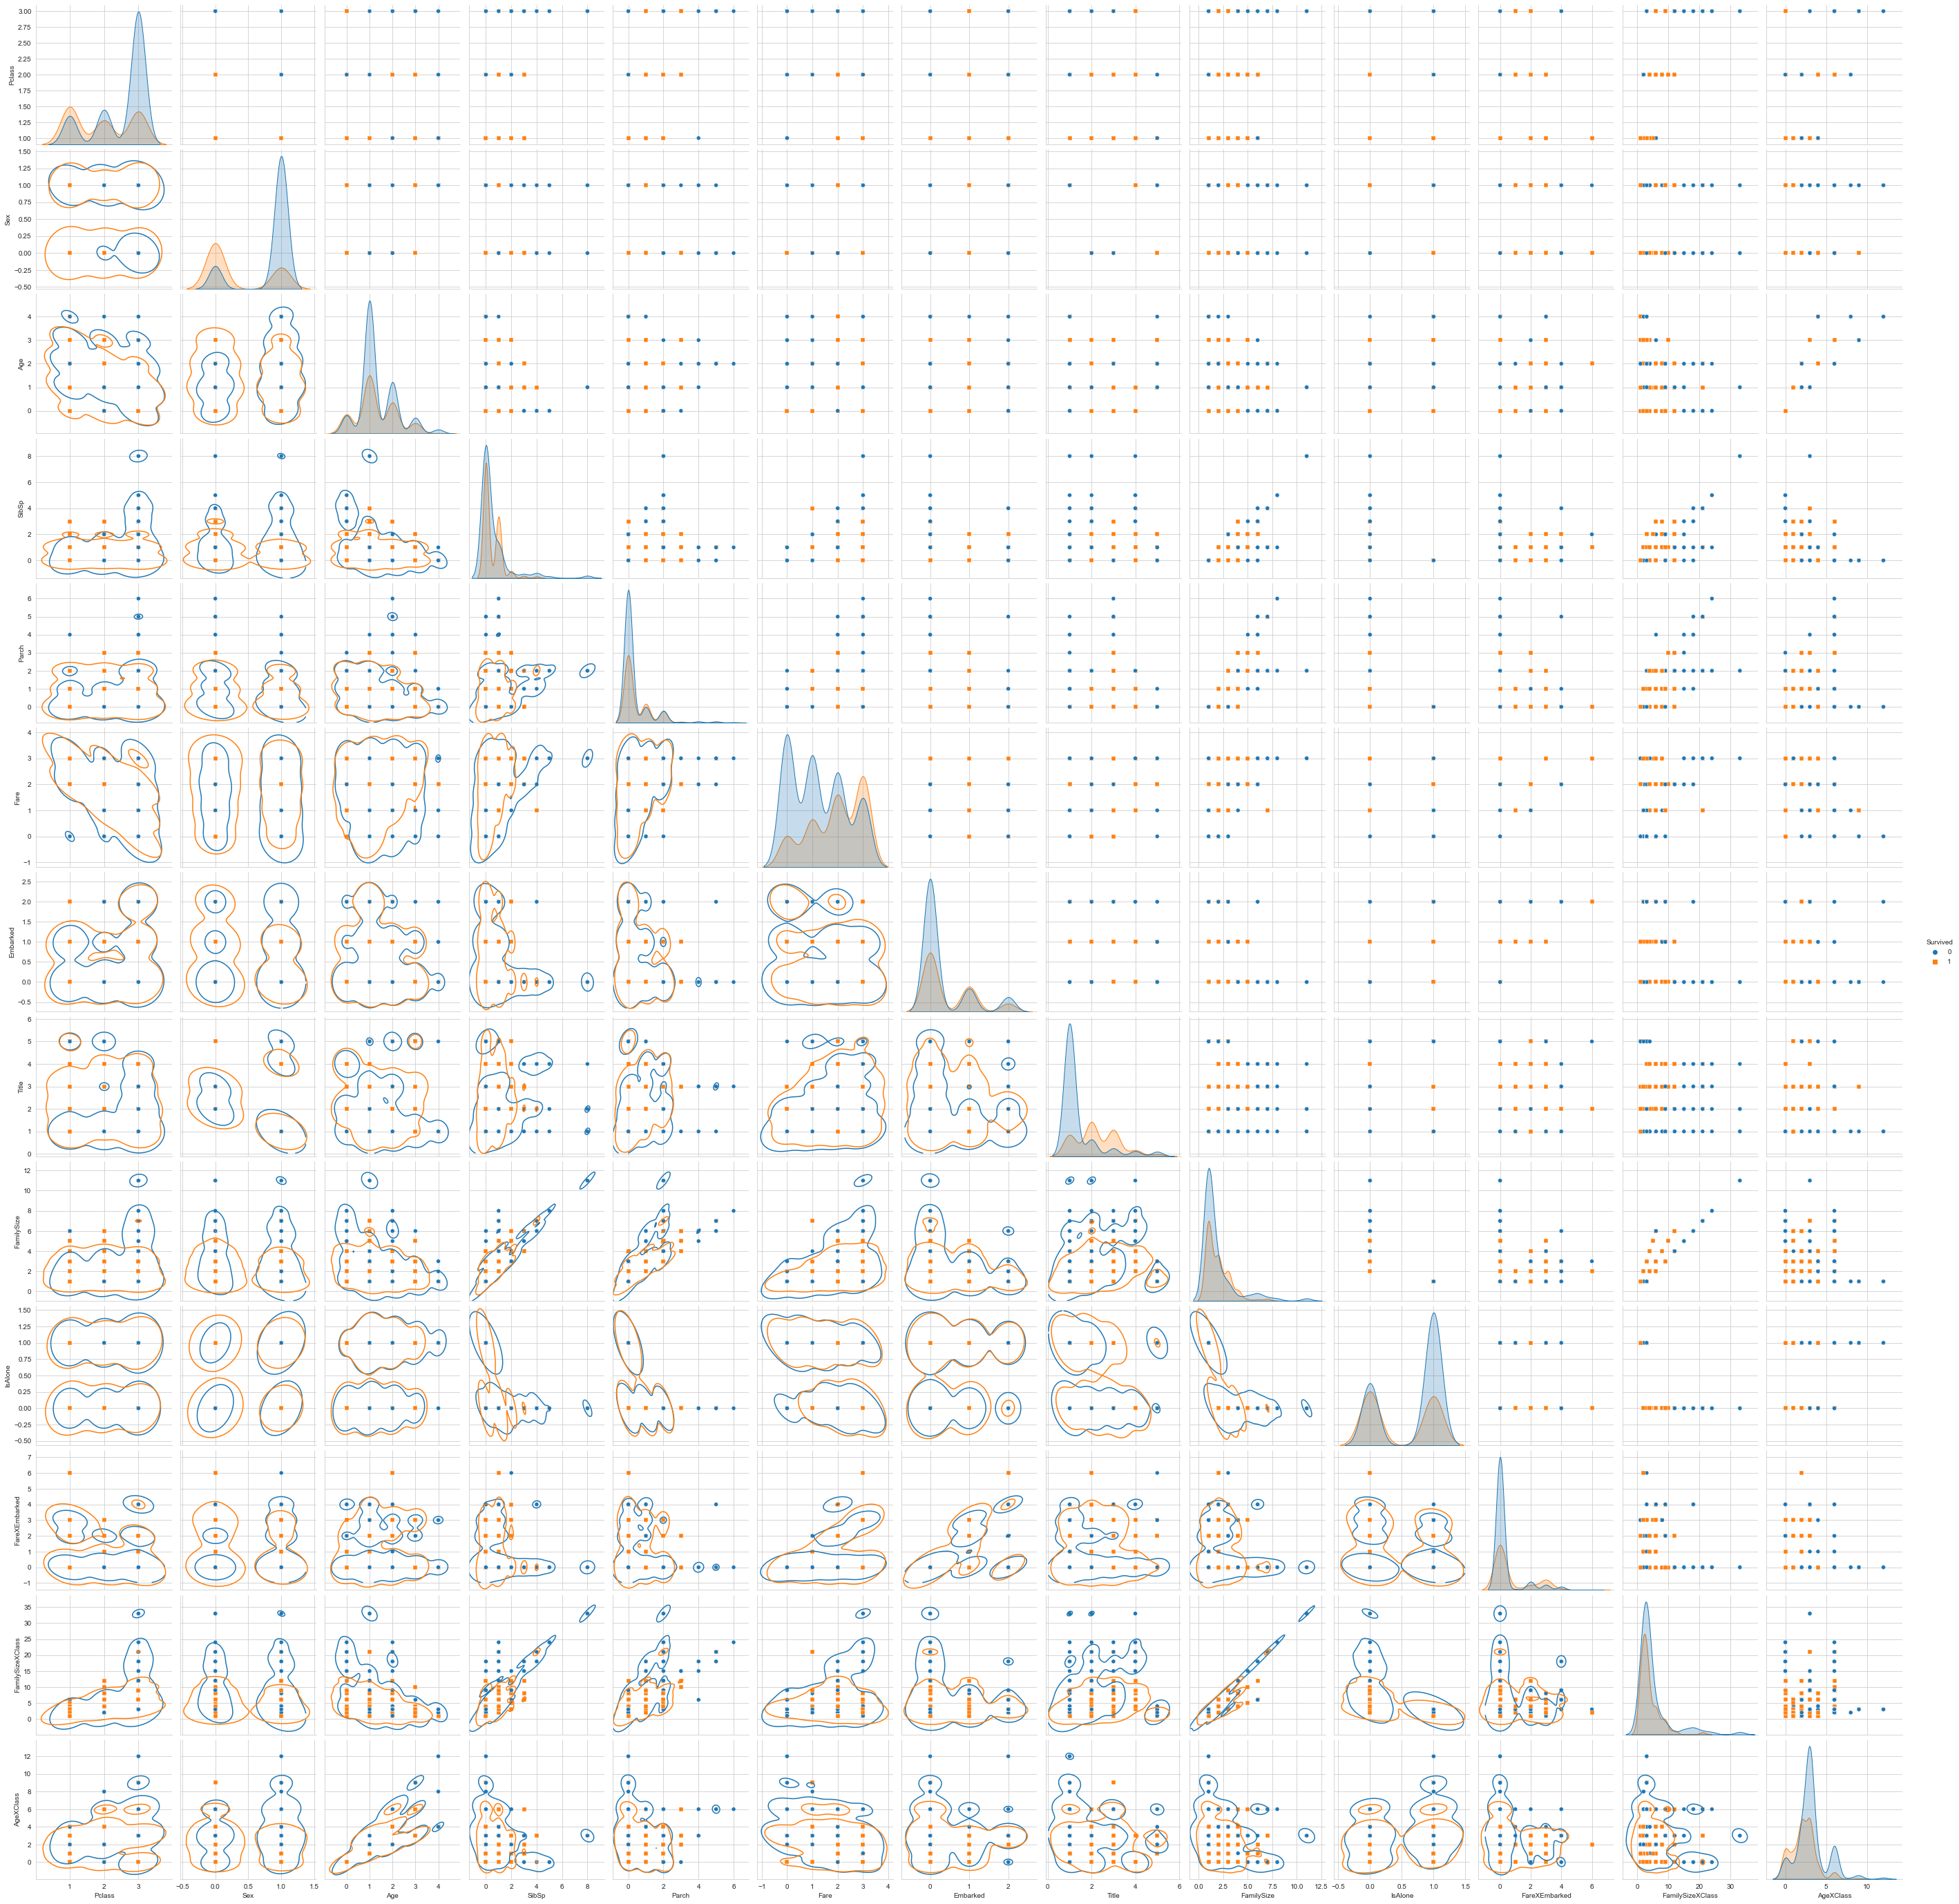

In [151]:
g = sns.pairplot(
    train_df,
    hue="Survived",
    height=3,
    diag_kind="kde",
    markers=["o", "s"],
)
g.map_lower(sns.kdeplot, levels=2, color=".2")
plt.show()

Correlation

<AxesSubplot:>

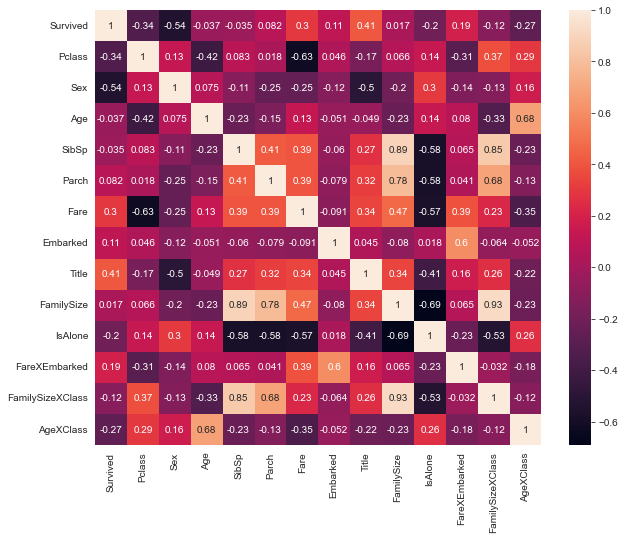

In [152]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    train_df.corr(),
    annot=True,
)

All features bar graph

<AxesSubplot:xlabel='Survived', ylabel='count'>

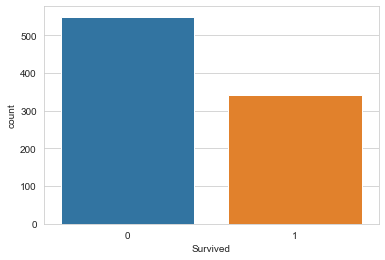

In [153]:
sns.countplot(x=train_df["Survived"], label="Count")

<AxesSubplot:xlabel='Pclass', ylabel='count'>

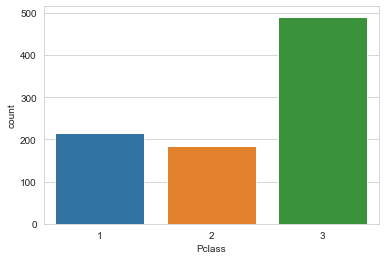

In [154]:
sns.countplot(x=train_df["Pclass"], label="Count")

<AxesSubplot:xlabel='Sex', ylabel='count'>

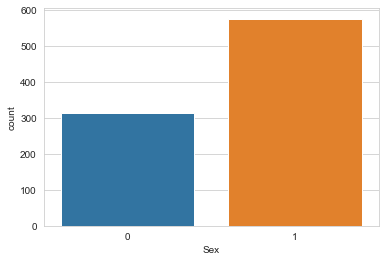

In [155]:
sns.countplot(x=train_df["Sex"], label="Count")

<AxesSubplot:xlabel='Age', ylabel='count'>

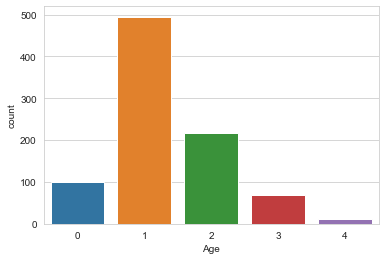

In [156]:
sns.countplot(x=train_df["Age"], label="Count")

<AxesSubplot:xlabel='SibSp', ylabel='count'>

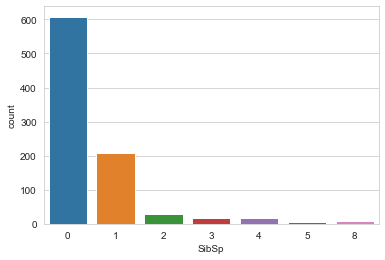

In [157]:
sns.countplot(x=train_df["SibSp"], label="Count")

<AxesSubplot:xlabel='Parch', ylabel='count'>

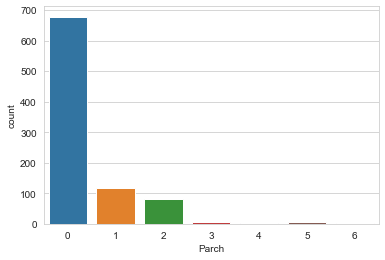

In [158]:
sns.countplot(x=train_df["Parch"], label="Count")

['Survived' 'Pclass' 'Sex' 'Age' 'SibSp' 'Parch' 'Fare' 'Embarked' 'Title'
 'FamilySize' 'IsAlone' 'Age*Class' 'Fare*Embarked' 'FamilySize*Class']

<AxesSubplot:xlabel='Fare', ylabel='count'>

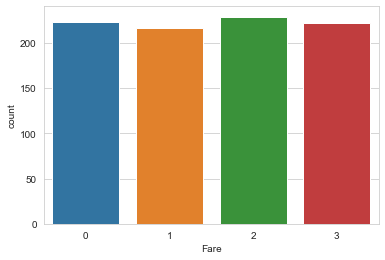

In [159]:
sns.countplot(x=train_df["Fare"], label="Count")

<AxesSubplot:xlabel='Embarked', ylabel='count'>

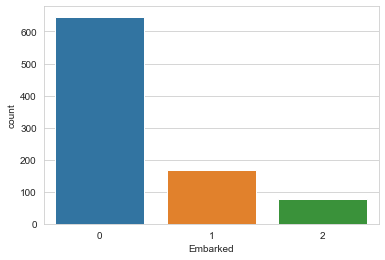

In [160]:
sns.countplot(x=train_df["Embarked"], label="Count")

<AxesSubplot:xlabel='Title', ylabel='count'>

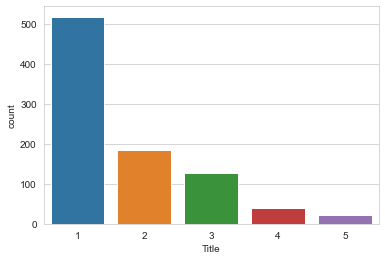

In [161]:
sns.countplot(x=train_df["Title"], label="Count")

<AxesSubplot:xlabel='FamilySize', ylabel='count'>

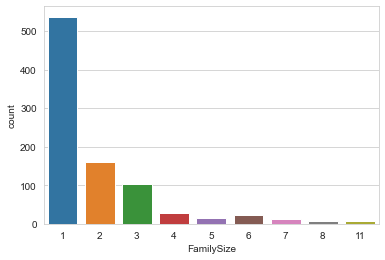

In [162]:
sns.countplot(x=train_df["FamilySize"], label="Count")

<AxesSubplot:xlabel='IsAlone', ylabel='count'>

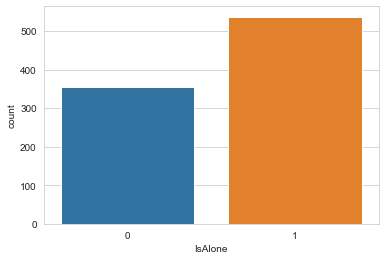

In [163]:
sns.countplot(x=train_df["IsAlone"], label="Count")

<AxesSubplot:xlabel='AgeXClass', ylabel='count'>

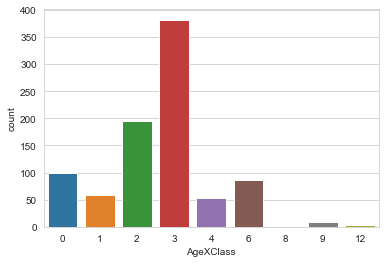

In [164]:
sns.countplot(x=train_df["AgeXClass"], label="Count")

<AxesSubplot:xlabel='FareXEmbarked', ylabel='count'>

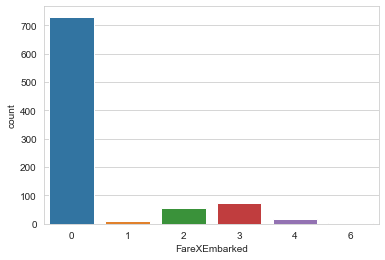

In [165]:
sns.countplot(x=train_df["FareXEmbarked"], label="Count")

<AxesSubplot:xlabel='FamilySizeXClass', ylabel='count'>

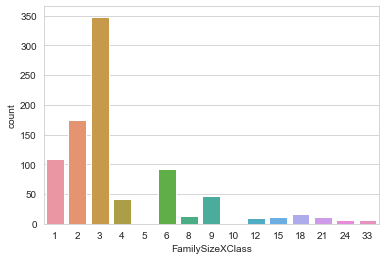

In [166]:
sns.countplot(x=train_df["FamilySizeXClass"], label="Count")

## Model, predict and solve


Train test split


In [167]:
# import train_test_split
from sklearn.model_selection import train_test_split

X = train_df.drop(["Survived"], axis=1)  # independent features
y = train_df["Survived"]  # dependant variable

# Choose your test size to split between training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [168]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

Logistic Regression

              precision    recall  f1-score   support

          No       0.83      0.84      0.84       134
         Yes       0.76      0.74      0.75        89

    accuracy                           0.80       223
   macro avg       0.79      0.79      0.79       223
weighted avg       0.80      0.80      0.80       223



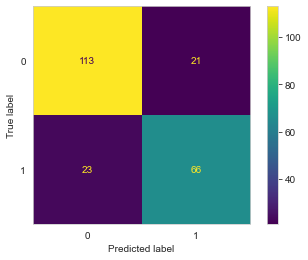

In [169]:
# Logistic Regression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
print(classification_report(y_test, Y_pred, target_names=["No", "Yes"]))
ConfusionMatrixDisplay.from_predictions(y_test, Y_pred)
plt.grid(visible=None)
plt.show()

Support Vector Machines

              precision    recall  f1-score   support

          No       0.84      0.85      0.84       134
         Yes       0.77      0.75      0.76        89

    accuracy                           0.81       223
   macro avg       0.80      0.80      0.80       223
weighted avg       0.81      0.81      0.81       223



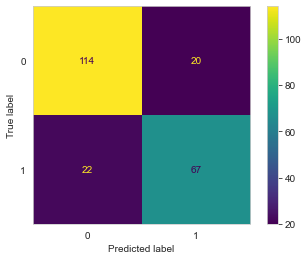

In [170]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
print(classification_report(y_test, Y_pred, target_names=["No", "Yes"]))
ConfusionMatrixDisplay.from_predictions(y_test, Y_pred)
plt.grid(visible=None)
plt.show()

KNN

              precision    recall  f1-score   support

          No       0.83      0.78      0.80       134
         Yes       0.70      0.75      0.72        89

    accuracy                           0.77       223
   macro avg       0.76      0.77      0.76       223
weighted avg       0.78      0.77      0.77       223



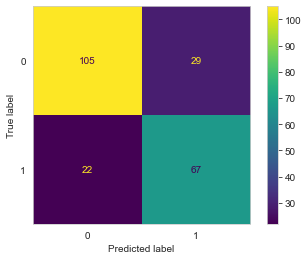

In [171]:
# KNN

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
print(classification_report(y_test, Y_pred, target_names=["No", "Yes"]))
ConfusionMatrixDisplay.from_predictions(y_test, Y_pred)
plt.grid(visible=None)
plt.show()

_To find best K_


In [172]:
# creating list of K for KNN
k_list = list(range(1, 100, 2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores = knn.score(X_train, y_train)
    cv_scores.append(scores.mean())

<Figure size 432x288 with 0 Axes>

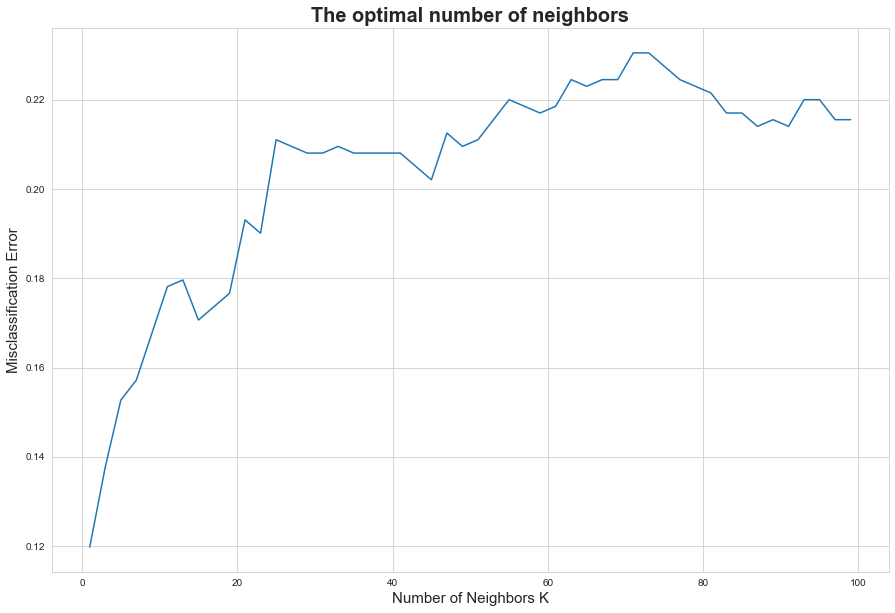

In [173]:
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15, 10))
plt.title("The optimal number of neighbors", fontsize=20, fontweight="bold")
plt.xlabel("Number of Neighbors K", fontsize=15)
plt.ylabel("Misclassification Error", fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [174]:
best_k = k_list[MSE.index(min(MSE))]
print(f"The optimal number of neighbors is {best_k}")

The optimal number of neighbors is 1


Gaussian Naive Bayes

              precision    recall  f1-score   support

          No       0.88      0.73      0.80       134
         Yes       0.68      0.85      0.76        89

    accuracy                           0.78       223
   macro avg       0.78      0.79      0.78       223
weighted avg       0.80      0.78      0.78       223



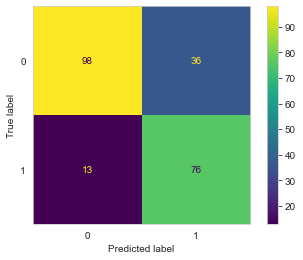

In [175]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
print(classification_report(y_test, Y_pred, target_names=["No", "Yes"]))
ConfusionMatrixDisplay.from_predictions(y_test, Y_pred)
plt.grid(visible=None)
plt.show()

Perceptron

              precision    recall  f1-score   support

          No       1.00      0.06      0.11       134
         Yes       0.41      1.00      0.59        89

    accuracy                           0.43       223
   macro avg       0.71      0.53      0.35       223
weighted avg       0.77      0.43      0.30       223



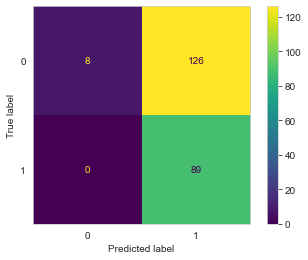

In [176]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)
print(classification_report(y_test, Y_pred, target_names=["No", "Yes"]))
ConfusionMatrixDisplay.from_predictions(y_test, Y_pred)
plt.grid(visible=None)
plt.show()

Linear SVC

d:\Code\Python\AI\Titanic\env\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


              precision    recall  f1-score   support

          No       0.83      0.85      0.84       134
         Yes       0.77      0.74      0.75        89

    accuracy                           0.81       223
   macro avg       0.80      0.80      0.80       223
weighted avg       0.81      0.81      0.81       223



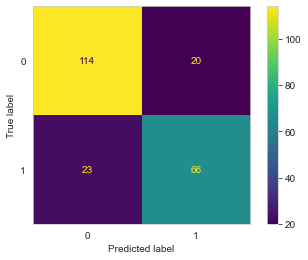

In [177]:
# Linear SVC

linear_svc = LinearSVC(max_iter=10000)
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
print(classification_report(y_test, Y_pred, target_names=["No", "Yes"]))
ConfusionMatrixDisplay.from_predictions(y_test, Y_pred)
plt.grid(visible=None)
plt.show()

Stochastic Gradient Descent

              precision    recall  f1-score   support

          No       0.79      0.84      0.81       134
         Yes       0.73      0.67      0.70        89

    accuracy                           0.77       223
   macro avg       0.76      0.75      0.76       223
weighted avg       0.77      0.77      0.77       223



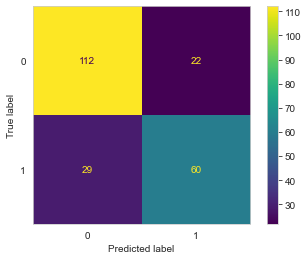

In [178]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
print(classification_report(y_test, Y_pred, target_names=["No", "Yes"]))
ConfusionMatrixDisplay.from_predictions(y_test, Y_pred)
plt.grid(visible=None)
plt.show()

Decision Tree

              precision    recall  f1-score   support

          No       0.83      0.79      0.81       134
         Yes       0.71      0.75      0.73        89

    accuracy                           0.78       223
   macro avg       0.77      0.77      0.77       223
weighted avg       0.78      0.78      0.78       223



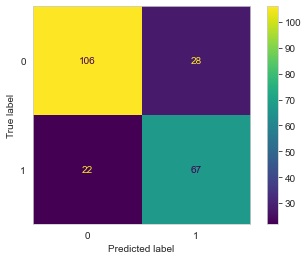

In [179]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
print(classification_report(y_test, Y_pred, target_names=["No", "Yes"]))
ConfusionMatrixDisplay.from_predictions(y_test, Y_pred)
plt.grid(visible=None)
plt.show()

Random Forest

              precision    recall  f1-score   support

          No       0.85      0.83      0.84       134
         Yes       0.75      0.79      0.77        89

    accuracy                           0.81       223
   macro avg       0.80      0.81      0.81       223
weighted avg       0.81      0.81      0.81       223



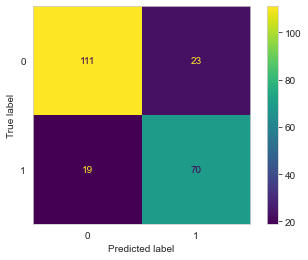

In [180]:
# Random Forest # best 86.64

random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print(classification_report(y_test, Y_pred, target_names=["No", "Yes"]))
ConfusionMatrixDisplay.from_predictions(y_test, Y_pred)
plt.grid(visible=None)
plt.show()

In [188]:
from sklearn.tree import export_graphviz

estimator = random_forest.estimators_[1]
tree_data = export_graphviz(
    estimator,
    out_file="tree.dot",
    feature_names=[
        "Pclass",
        "Sex",
        "Age",
        "SibSp",
        "Parch",
        "Fare",
        "Embarked",
        "Title",
        "FamilySize",
        "IsAlone",
        "FareXEmbarked",
        "FamilySizeXClass",
        "AgeXClass",
    ],
    rounded=True,
    proportion=False,
    precision=1,
    filled=True,
)

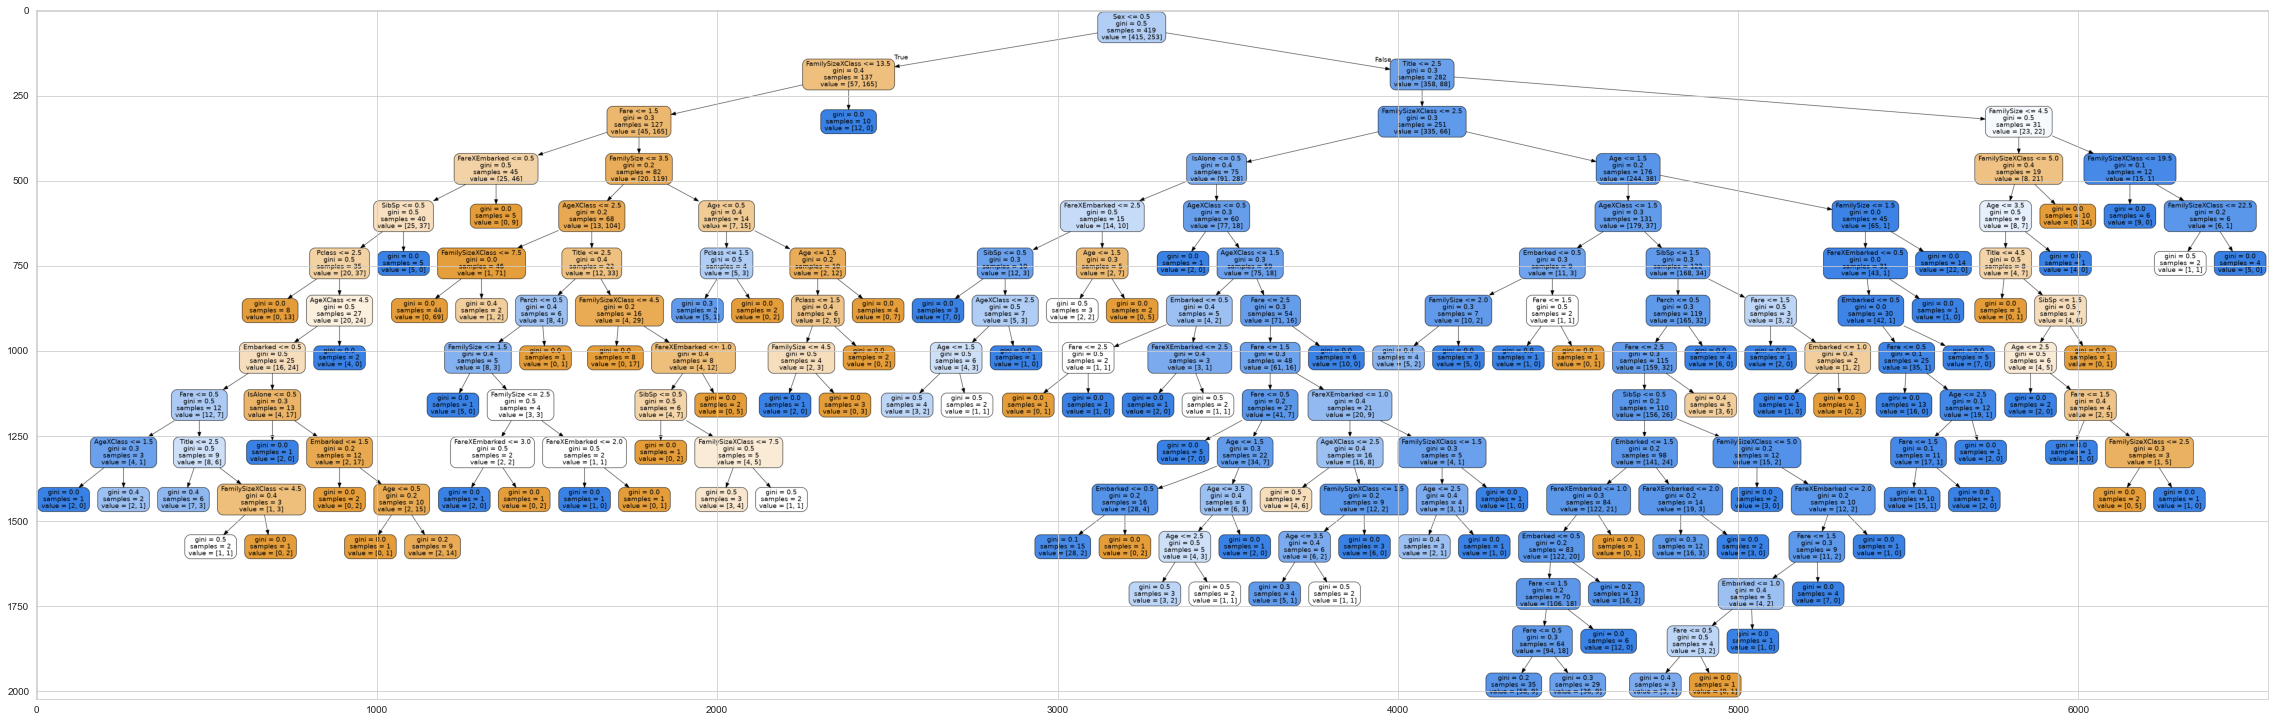

In [190]:
import cv2

try:
    img = cv2.imread("tree.png")
    plt.figure(figsize=(40, 40))
    plt.imshow(img)
except Exception:
    print("Image not found! Read the above markup 😅")

## Model evaluation


In [181]:
models = pd.DataFrame(
    {
        "Model": [
            "Support Vector Machines",
            "KNN",
            "Logistic Regression",
            "Random Forest",
            "Naive Bayes",
            "Perceptron",
            "Stochastic Gradient Decent",
            "Linear SVC",
            "Decision Tree",
        ],
        "Score": [
            acc_svc,
            acc_knn,
            acc_log,
            acc_random_forest,
            acc_gaussian,
            acc_perceptron,
            acc_sgd,
            acc_linear_svc,
            acc_decision_tree,
        ],
    }
)
models.sort_values(by="Score", ascending=False)

,Model,Score
3,Random Forest,89.37
8,Decision Tree,89.37
1,KNN,88.02
0,Support Vector Machines,83.23
2,Logistic Regression,83.08
7,Linear SVC,82.19
6,Stochastic Gradient Decent,77.54
4,Naive Bayes,77.40
5,Perceptron,43.41


## Print Result

In [182]:
final_X_test = test_df.drop("PassengerId", axis=1).copy()

In [183]:
final_Y_pred = random_forest.predict(final_X_test)

In [184]:
submission = pd.DataFrame(
    {"PassengerId": test_df["PassengerId"], "Survived": final_Y_pred}
)
submission.to_csv("./output/submission.csv", index=False)